# DATA INFORMATION
# Sabemos por el análisis SAM que los valores de arousal, valence, dominance y liking estarán en el rango [1-9]

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

files = os.listdir('data_preprocessed_python\\')

list_of_dfs = []
for file in files:
    with open(os.path.join('data_preprocessed_python\\',file), 'rb') as pickle_file:
        dictRaw = pd.read_pickle(pickle_file) 
        labels = dictRaw.get('labels')
        data = dictRaw.get('data')
        
        dfLabels = pd.DataFrame(data=labels, columns=["valence", "arousal", "dominance", "liking"])

        a,b,c = data.shape
        E = data.reshape(40, 322560)
        allData = pd.DataFrame(E).transpose()
        rows = list()
        for _,row in dfLabels.iterrows():
            rows += [row]*8064
        aux = pd.DataFrame(rows).reset_index(drop=True)
        allData = allData.merge(aux, left_index=True, right_index=True)
        
        list_of_dfs.append(allData)
data = pd.concat(list_of_dfs, ignore_index=True)

data.columns = ['FP1','AF3','F7','F3','FC1','FC5','T7','C3','CP1','CP5','P7','P3','Pz','PO3','O1','Oz','O2','PO4','P4','P8','CP6','CP2','C4','T8','FC6','FC2','F4','F8','AF4','Fp2','Fz','Cz','hEOG','vEOG','zEMG','tEMG','GSR','Respiration','PLethy','Temperature','valence', 'arousal', 'dominance', 'liking']

data.drop(['hEOG','vEOG','zEMG','tEMG','GSR','Respiration','PLethy','Temperature'],axis = 'columns', inplace=True)

data
# En data tenemos la información de todos los sujetos

,FP1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,F4,F8,AF4,Fp2,Fz,Cz,valence,arousal,dominance,liking
0,0.948232,10.260175,1.013050,-7.658428,-1.811108,11.011411,3.026008,-2.380048,3.978952,-9.657708,...,4.239575,4.888393,0.596471,0.589618,-2.276449,-0.109300,7.71,7.60,6.9,7.83
1,1.653335,12.795443,-1.067832,-3.267558,-4.783876,7.402976,2.676232,-3.614201,-1.434440,-0.906298,...,4.557239,6.007259,-1.881391,-4.831903,-1.739787,-6.518661,7.71,7.60,6.9,7.83
2,3.013726,10.426192,3.908249,0.701542,-0.522649,1.120469,2.046996,-4.286566,-6.174767,9.408599,...,0.636801,2.921478,-4.484906,-8.186728,0.555901,-11.727187,7.71,7.60,6.9,7.83
3,1.495061,8.229207,6.094405,2.959722,1.299854,-0.832024,2.192056,-5.170547,-6.571542,14.101073,...,-2.965047,-0.679860,-4.483488,-7.905437,-1.168129,-9.051847,7.71,7.60,6.9,7.83
4,-1.264836,3.751782,4.145906,3.459897,-0.916779,-0.784404,-4.694002,-5.332026,-7.793136,16.284187,...,3.248115,-1.103246,-2.547386,-4.419073,-1.319219,-4.072682,7.71,7.60,6.9,7.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10321915,-32.686626,-118.432236,107.674687,71.185171,-81.400159,-31.566511,128.195564,-93.473053,151.210251,-68.675085,...,-85.715499,-205.343696,-77.855162,3.823642,39.977058,-161.983832,7.15,4.03,9.0,1.88
10321916,-0.499185,-151.650924,62.237271,110.122599,-118.743840,69.402053,75.226912,-70.535596,183.491442,-53.675112,...,-39.621834,-223.718662,-38.542735,38.761077,27.164582,-181.327546,7.15,4.03,9.0,1.88
10321917,-64.780317,-113.557245,87.924724,107.091355,-64.368940,166.745623,103.226860,-97.848045,177.491453,-102.675022,...,-47.309320,-222.187415,-45.323972,21.011110,74.945744,-162.327581,7.15,4.03,9.0,1.88
10321918,-5.030427,-136.619702,80.080988,98.872620,-113.806349,203.276805,96.226873,-93.723053,184.335190,-56.362607,...,46.628006,-220.749918,-69.448928,20.104862,19.914595,-171.140065,7.15,4.03,9.0,1.88


# Estudio de los datos del dataframe

In [46]:
mean_values = []
for col in data:
    mean_values.append(data[col].mean())
#df_mean = pd.DataFrame(data=mean_values, columns=['FP1','AF3','F7','F3','FC1','FC5','T7','C3','CP1','CP5','P7','P3','Pz','PO3','O1','Oz','O2','PO4','P4','P8','CP6','CP2','C4','T8','FC6','FC2','F4','F8','AF4','Fp2','Fz','Cz','valence', 'arousal', 'dominance', 'liking'])
#print(df_mean)
print(mean_values)
print("\n\n")
max_values = []
for col in data:
    max_values.append(data[col].max())
print(max_values)
print("\n\n")
min_values = []
for col in data:
    min_values.append(data[col].min())
print(min_values)

[29.705425896776287, 109.0042431096876, 213.90502321814446, 106.59107113083525, -68.41339729267945, 113.5954314789927, 609.6143701666228, 273.3502849263363, -6.8617475306337345, 124.08413071115996, 77.1165088285053, 200.77020217757627, 108.40680924155784, 347.24635530315834, 164.13414449207323, 37.800683614270895, 328.70055694584386, 18.111486067064376, 173.84630010947225, 155.48838473730035, 151.26956138402284, 190.01091013147058, 57.88945221754422, 178.5556439012668, 275.38654075675527, -0.7935174388899515, 316.5135063489869, 378.05883155489363, 71.00859108733127, 21.156810585264477, 186.77706456552235, 395.04674328067546, 5.2543125, 5.156710937500006, 5.382749999999998, 5.518132812499993]



[66926.61540424766, 413644.43637794885, 217348.2960868862, 320598.17126978515, 149890.41013859166, 223730.3841748091, 1059702.9986999228, 404147.7813014055, 277623.4423492416, 248407.8212027445, 146926.96366272238, 239518.17859320948, 87463.464824747, 505994.3335450294, 371974.82863911893, 13840

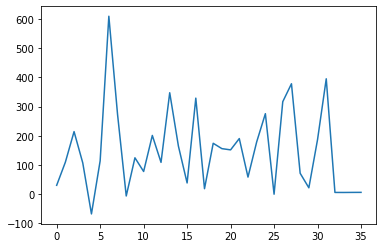

In [25]:
import matplotlib.pyplot as plt
plt.plot(mean_values)
plt.show()

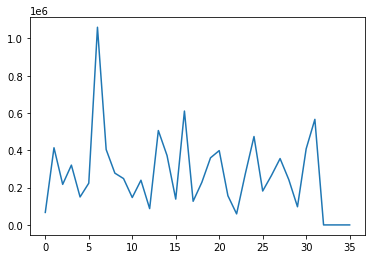

In [21]:
plt.plot(max_values)
plt.show()

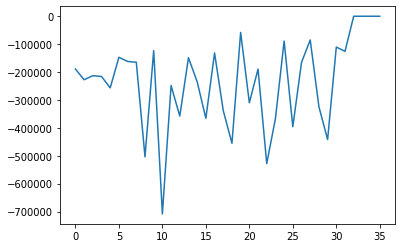

In [23]:
plt.plot(min_values)
plt.show()

# PRUEBAS CON SÓLO 1 SUJETO

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

files = os.listdir('d\\')

list_of_dfs = []
for file in files:
    with open(os.path.join('d\\',file), 'rb') as pickle_file:
        dictRaw = pd.read_pickle(pickle_file) 
        labels = dictRaw.get('labels')
        data = dictRaw.get('data')
        
        dfLabels = pd.DataFrame(data=labels, columns=["valence", "arousal", "dominance", "liking"])

        a,b,c = data.shape
        E = data.reshape(40, 322560)
        allData = pd.DataFrame(E).transpose()
        rows = list()
        for _,row in dfLabels.iterrows():
            rows += [row]*8064
        aux = pd.DataFrame(rows).reset_index(drop=True)
        allData = allData.merge(aux, left_index=True, right_index=True)
        
        list_of_dfs.append(allData)
big_df = pd.concat(list_of_dfs, ignore_index=True)#ignore_index to reset index of big_df


big_df.columns = ['FP1','AF3','F7','F3','FC1','FC5','T7','C3','CP1','CP5','P7','P3','Pz','PO3','O1','Oz','O2','PO4','P4','P8','CP6','CP2','C4','T8','FC6','FC2','F4','F8','AF4','Fp2','Fz','Cz','hEOG','vEOG','zEMG','tEMG','GSR','Respiration','PLethy','Temperature','valence', 'arousal', 'dominance', 'liking']

big_df

,FP1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,zEMG,tEMG,GSR,Respiration,PLethy,Temperature,valence,arousal,dominance,liking
0,0.948232,10.260175,1.013050,-7.658428,-1.811108,11.011411,3.026008,-2.380048,3.978952,-9.657708,...,-16.301457,-0.706001,-1.398098,-11.394413,2.531878,3.083006,7.71,7.60,6.90,7.83
1,1.653335,12.795443,-1.067832,-3.267558,-4.783876,7.402976,2.676232,-3.614201,-1.434440,-0.906298,...,-4.812761,-5.921890,2.184835,-13.450227,0.158111,0.627215,7.71,7.60,6.90,7.83
2,3.013726,10.426192,3.908249,0.701542,-0.522649,1.120469,2.046996,-4.286566,-6.174767,9.408599,...,6.188724,-5.339078,0.680208,-9.662999,-4.674497,-3.402560,7.71,7.60,6.90,7.83
3,1.495061,8.229207,6.094405,2.959722,1.299854,-0.832024,2.192056,-5.170547,-6.571542,14.101073,...,10.774304,-2.384648,-3.005392,-1.804665,-11.282898,-5.091942,7.71,7.60,6.90,7.83
4,-1.264836,3.751782,4.145906,3.459897,-0.916779,-0.784404,-4.694002,-5.332026,-7.793136,16.284187,...,14.252287,-4.426890,-7.057571,6.404798,-11.679159,-5.858427,7.71,7.60,6.90,7.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322555,-0.097608,-0.062015,-0.151092,0.013060,-0.046585,-0.060403,0.149920,0.000826,0.214036,-0.050429,...,0.027177,0.028145,0.059504,0.046749,-0.010698,0.186422,5.10,7.12,6.17,5.97
322556,-0.097608,-0.062015,-0.151092,0.013060,-0.046585,-0.060403,0.149920,0.000826,0.215036,-0.050429,...,0.028177,0.028145,0.059504,0.046749,-0.010698,0.186422,5.10,7.12,6.17,5.97
322557,-0.097608,-0.062015,-0.151092,0.013060,-0.046585,-0.060403,0.149920,0.000826,0.215036,-0.050429,...,0.028177,0.028145,0.059504,0.046749,-0.010698,0.186422,5.10,7.12,6.17,5.97
322558,-0.097608,-0.062015,-0.151092,0.013060,-0.046585,-0.060403,0.149920,0.000826,0.214036,-0.050429,...,0.028177,0.028145,0.059504,0.046749,-0.010698,0.186422,5.10,7.12,6.17,5.97


In [4]:
big_df.drop(['hEOG','vEOG','zEMG','tEMG','GSR','Respiration','PLethy','Temperature'],axis = 'columns', inplace=True)
big_df

,FP1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,F4,F8,AF4,Fp2,Fz,Cz,valence,arousal,dominance,liking
0,0.948232,10.260175,1.013050,-7.658428,-1.811108,11.011411,3.026008,-2.380048,3.978952,-9.657708,...,4.239575,4.888393,0.596471,0.589618,-2.276449,-0.109300,7.71,7.60,6.90,7.83
1,1.653335,12.795443,-1.067832,-3.267558,-4.783876,7.402976,2.676232,-3.614201,-1.434440,-0.906298,...,4.557239,6.007259,-1.881391,-4.831903,-1.739787,-6.518661,7.71,7.60,6.90,7.83
2,3.013726,10.426192,3.908249,0.701542,-0.522649,1.120469,2.046996,-4.286566,-6.174767,9.408599,...,0.636801,2.921478,-4.484906,-8.186728,0.555901,-11.727187,7.71,7.60,6.90,7.83
3,1.495061,8.229207,6.094405,2.959722,1.299854,-0.832024,2.192056,-5.170547,-6.571542,14.101073,...,-2.965047,-0.679860,-4.483488,-7.905437,-1.168129,-9.051847,7.71,7.60,6.90,7.83
4,-1.264836,3.751782,4.145906,3.459897,-0.916779,-0.784404,-4.694002,-5.332026,-7.793136,16.284187,...,3.248115,-1.103246,-2.547386,-4.419073,-1.319219,-4.072682,7.71,7.60,6.90,7.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322555,-0.097608,-0.062015,-0.151092,0.013060,-0.046585,-0.060403,0.149920,0.000826,0.214036,-0.050429,...,-0.101962,0.036677,-0.007930,0.081379,-0.081538,-0.009341,5.10,7.12,6.17,5.97
322556,-0.097608,-0.062015,-0.151092,0.013060,-0.046585,-0.060403,0.149920,0.000826,0.215036,-0.050429,...,-0.101962,0.036677,-0.007930,0.081379,-0.081538,-0.009341,5.10,7.12,6.17,5.97
322557,-0.097608,-0.062015,-0.151092,0.013060,-0.046585,-0.060403,0.149920,0.000826,0.215036,-0.050429,...,-0.101962,0.036677,-0.007930,0.081379,-0.082538,-0.009341,5.10,7.12,6.17,5.97
322558,-0.097608,-0.062015,-0.151092,0.013060,-0.046585,-0.060403,0.149920,0.000826,0.214036,-0.050429,...,-0.101962,0.036677,-0.007930,0.081379,-0.081538,-0.009341,5.10,7.12,6.17,5.97


# REGRESSION

In [26]:
# Linear regressor

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
data = big_df.iloc[:,0:32]
labels = big_df.iloc[:,32:36]

lin_reg.fit(data, labels)

linear_predictor = lin_reg.predict(data)
linear_predictor

array([[5.25838171, 5.59610861, 5.90911369, 6.87436983],
       [5.25699007, 5.59707262, 5.90931626, 6.87377288],
       [5.25506965, 5.59834133, 5.90920977, 6.8727828 ],
       ...,
       [5.2566968 , 5.5970094 , 5.90935979, 6.87292762],
       [5.25669681, 5.59700942, 5.90935981, 6.87292764],
       [5.2566968 , 5.5970094 , 5.90935979, 6.87292762]])

In [27]:
labels

,valence,arousal,dominance,liking
0,7.71,7.60,6.90,7.83
1,7.71,7.60,6.90,7.83
2,7.71,7.60,6.90,7.83
3,7.71,7.60,6.90,7.83
4,7.71,7.60,6.90,7.83
...,...,...,...,...
322555,5.10,7.12,6.17,5.97
322556,5.10,7.12,6.17,5.97
322557,5.10,7.12,6.17,5.97
322558,5.10,7.12,6.17,5.97


In [28]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(labels, linear_predictor)
lin_mrse = np.sqrt(lin_mse)
lin_mrse

# Error medio del predictor : 1.982190887189638

1.982190887189638

In [29]:
# Decission Tree Regressor
# This is a powerful model, capable of finding complex nonlinear relationships in the data

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(data, labels)
tree_predictions = tree_reg.predict(data)
tree_mse = mean_squared_error(labels, tree_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

# Error medio del predictor : 1.878413644294006e-13
# Error bajísimo, "the model has badly overfit the data"

1.9425473088601025e-13

In [30]:
# K-fold cross-validation feature

# With tree decisor
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, data, labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())





In [31]:
display_scores(tree_rmse_scores)

##############################################
# NO ENTIENDO MUY BIEN ESTOS VALORES DE MEDIA Y DESVIACIÓN TÍPICA, DISTAN MUCHO DE LO QUE DEBERÍAN
##############################################

Scores: [2.88444308 2.6924784  3.25659122 3.09775397 2.91981709 2.93200716
 2.76263384 3.4728686  1.96863798 2.1112571 ]
Mean: 2.809848843654733
Standard deviation: 0.44343144923821176


In [32]:
# With linear regression

lin_scores = cross_val_score(lin_reg, data, labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [  1.98704937   1.89037368   2.4939853    2.37306445   1.89885236
   2.30325901   1.89853493   2.85537378   2.13526026 149.24104334]
Mean: 16.907679647809513
Standard deviation: 44.11212254550436


In [33]:
# RandomForest Regressor
'''
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(data, labels)
forest_scores = cross_val_score(forest_reg, data, labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)
'''

In [34]:
from sklearn.model_selection import GridSearchCV

# No me cuadra lo que dice en el libro de combinaciones con lo que hay en el código
# Pone que primero prueba 12 combinaciones (3x4), pero yo entiendo que son 3x2 (s_stimators x max_features)
#param_grid = [
#    {'n_stimators': [3,10,30], 'max_features': [2,4,6,8]},
#    {'bootstrap': [False], 'n_stimators': [3,10], 'max_features': [2,3,4]}
#]

# Cross-Validation de 5, el total de combinaciones será cv * la suma de las combinaciones de param_grid
#grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
#grid_search.fit(data, labels)

In [35]:
#grid_search.best_estimator_

# No entiendo el siguiente paso de obtener los resultados
# Se tiene que mirar el valor de los parámetros de todos los resultados del RMSE y comprobar cuáles se corresponden con los del mejor estimador???

In [36]:
#cvres = grid_search.cv_results_
#for mean_score, params in zip (cvres['mean_test_score'], cvres['params']):
#    print(np.sqrt(-mean_score), params)

In [37]:
# RandomizedSearchCV : No entiendo los parámetros que hay que seleccionar

#########################################
# Buscar documentación para ver cómo se seleccionan
#########################################

##########################################
# De la parte de analizar los modelos y sus errores, no entiendo cómo se construye, pero creo que puede ser útil para eliminar features que no sean relevantes, como dice en el texto
##########################################

# CLASSIFICATION

In [6]:
# Clasificar por "liking" sin tener nada en cuenta
# OJO! Sólo estamos teniendo en cuenta el experimento sobre el primer sujeto (primer fichero)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data_copy = big_df
labels_copy = labels

data2 = data_copy.drop(['valence', 'arousal', 'dominance'], axis=1)
data2['liking'] = np.where(data_copy['liking'] <4, 'unlike', 'like')

copia =data2.copy()

y = copia[['liking']]

x = copia.drop(columns=['liking'])

xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.2, random_state = 1)

clf = RandomForestClassifier(max_depth=2, random_state=0, verbose=1, n_jobs=5)
clf.fit(xTrain, yTrain)

predict = clf.predict(xTest)

print("ACCURACY : " + str(accuracy_score(yTest, predict)))

<ipython-input-6-f9151dc22ef9>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xTrain, yTrain)
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    4.9s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:   11.9s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.1s finished
ACCURACY : 0.9716951884920635


In [7]:
# Training a Binary Classifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_predict

data2_copy = big_df
d = data2_copy.drop(['valence', 'arousal', 'dominance'], axis=1)

y = d['liking']
x = d.drop(columns=['liking'])

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)

y_train_like = (y_train > 4)
y_test_like = (y_test > 4)

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(x_train, y_train_like)

sgd_clf.predict(x_test)

array([ True,  True,  True, ...,  True,  True,  True])

In [8]:
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_like, cv=3)

cross_val_score(sgd_clf, x_train, y_train_like, cv=3, scoring="accuracy")

array([0.95183454, 0.95735677, 0.9656343 ])

In [9]:
precision_score(y_train_like, y_train_pred)

0.9700745529430165

In [10]:
recall_score(y_train_like, y_train_pred)

0.9865209872917993

In [11]:
from sklearn.metrics import f1_score

f1_score(y_train_like, y_train_pred)

0.9782286487284375

In [13]:
# Measuring accuracy using CV
'''
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(x_train, y_train_like):
    clone_clf = clone(sgd_clf)
    X_train_folds = x_train[train_index]
    y_train_folds = y_train_like[train_index]
    X_test_fold = x_train[test_index]
    y_test_fold = y_train_like[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))
'''

KeyError: "None of [Int64Index([ 86005,  86006,  86007,  86008,  86009,  86010,  86012,  86013,\n             86014,  86015,\n            ...\n            258038, 258039, 258040, 258041, 258042, 258043, 258044, 258045,\n            258046, 258047],\n           dtype='int64', length=172032)] are in the [columns]"